https://mxnet.apache.org/api/python/docs/tutorials/packages/gluon/blocks/save_load_params.html

https://beta.mxnet.io/guide/packages/gluon/image/pretrained_models.html

In [1]:
import mxnet as mx
import gluoncv
from mxnet.gluon import Block, nn

In [2]:
%matplotlib inline

import json
import matplotlib.pyplot as plt

import mxnet as mx
import mxnet.ndarray as nd
from mxnet import gluon, nd, image

import gluoncv
from gluoncv import utils

import numpy as np

In [3]:
# model_name = 'mobilenetv2_1.0' # not in 0.2.0
# model_name = 'mobilenet1.0'
model_name = 'cifar_resnet20_v1'
output_data_dir = '.'

In [4]:
net = gluoncv.model_zoo.get_model(name=model_name, pretrained=True)

In [5]:
net.hybridize()

dummy = nd.random.randn(1,3,244,244)
dummy.shape

pred = net(dummy)

net.export(model_name)

In [6]:
net_with_softmax = net(mx.sym.var('data'))
net_with_softmax = mx.sym.SoftmaxOutput(data=net_with_softmax, name='softmax')
net_with_softmax.save('./cifar_resnet20_v1-symbol.json')

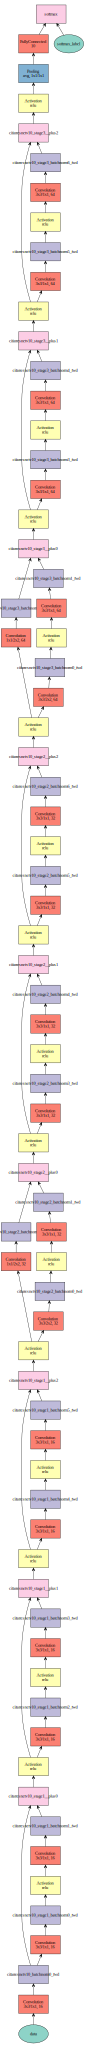

In [7]:
mx.viz.plot_network(net_with_softmax)

In [8]:
!ls -l cifar_resnet20_v1*

-rw-r--r--  1 muhyun  ANT\Domain Users  1105597 Oct 21 17:55 cifar_resnet20_v1-0000.params
-rw-r--r--  1 muhyun  ANT\Domain Users    57026 Oct 21 17:55 cifar_resnet20_v1-symbol.json


In [9]:
!tar cvfz cifar_resnet20_v1.tar.gz ./cifar_resnet20_v1-0000.params ./cifar_resnet20_v1-symbol.json

a ./cifar_resnet20_v1-0000.params
a ./cifar_resnet20_v1-symbol.json
